In [1]:
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.simplefilter('ignore')

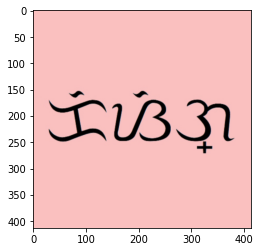

In [48]:
img = cv2.imread('../Test/MAKISIG2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

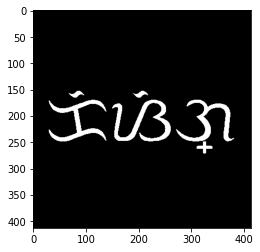

In [49]:
# Blurring for removing the noise 
img_blur = cv2.bilateralFilter(img, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)
# Convert to grayscale 
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
# Apply the thresholding
a = img_gray.max()  
_, thresh = cv2.threshold(img_gray, a/2+60, a,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

In [57]:
contours, hierarchy = cv2.findContours(image = thresh, mode = cv2.RETR_CCOMP, method = cv2.CHAIN_APPROX_SIMPLE)

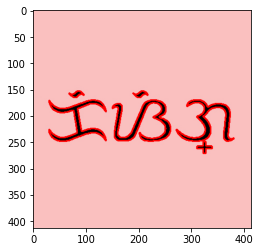

In [58]:
# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
plt.imshow(img_copy)

In [59]:
# The first order of the contours
c_0 = contours[0]
# image moment
M = cv2.moments(c_0)
print(M.keys())

dict_keys(['m00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03'])


In [60]:
# The first order of the contours
c_0 = contours[0]
# Get the 4 points of the bounding rectangle
x, y, w, h = cv2.boundingRect(c_0)
# Draw a straight rectangle with the points
img_copy = img.copy()
img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)

In [61]:
# Get the 4 points of the bounding rectangle with the minimum area
rect = cv2.minAreaRect(c_0)
box = cv2.boxPoints(rect)
box = box.astype('int')
# Draw a contour with the points 
img_copy = img.copy()
img_box_2 = cv2.drawContours(img_copy, contours = [box], 
                             contourIdx = -1, 
                             color = (255, 0, 0), thickness = 2)

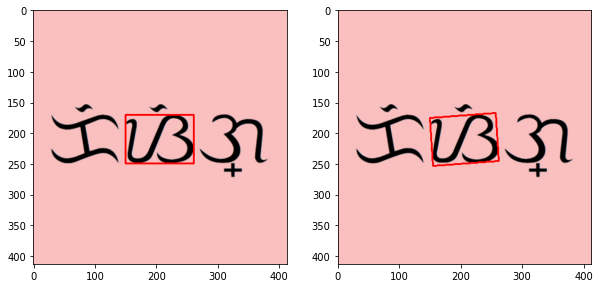

In [62]:
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1); plt.imshow(img_box)
plt.subplot(1, 2, 2); plt.imshow(img_box_2)

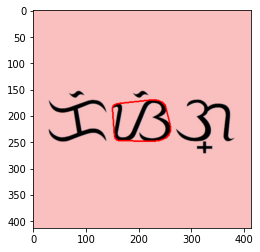

In [56]:
# Detect the convex contour
hull = cv2.convexHull(c_0)
img_copy = img.copy()
img_hull = cv2.drawContours(img_copy, contours = [hull], 
                            contourIdx = 0, 
                            color = (255, 0, 0), thickness = 2)
plt.imshow(img_hull)